In [29]:
import pandas as pd
import numpy as np
import urllib.parse
import matplotlib.pyplot as plt

In [31]:
url = "https://uk.wikipedia.org/wiki/Населення_України"
encoded_url = urllib.parse.quote(url, safe=':/')

tables = pd.read_html(encoded_url)
print(f"Кількість таблиць на сторінці: {len(tables)}")
# for i, table in enumerate(tables):
    # print(f"\nТаблиця {i}:")
    # print(table.head())

# df = tables[12]
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

print(df)


Кількість таблиць на сторінці: 71
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.

In [33]:
# Вивести перші рядки таблиці за допомогою методу head
print("Перші рядки таблиці:")
print(df.head())

Перші рядки таблиці:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [35]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
rows, columns = df.shape
print(f"Кількість рядків: {rows}, Кількість стовпців: {columns}")

Кількість рядків: 28, Кількість стовпців: 9


In [37]:
# Замініть у таблиці значення "—" на значення NaN
# df.replace("—", pd.NA, inplace=True)
df = df.replace({'—': np.NaN})

print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [39]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("Типи стовпців:")
print(df.dtypes)

Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [51]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
# for col in df.columns:
#     if col != 'Регіон':  # Пропустити стовпець "Регіон"
#         try:
#             df.loc[:, col] = pd.to_numeric(df[col])
#         except ValueError:
#             print(f"Не вдалося перетворити стовпець {col} на числовий тип.")
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)

print(df)

               Регіон    1950       1960  1970  1990  2000  2012  2014  2019
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.400  19.200000  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.700  25.000000  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.400  20.400000  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.100  21.400000  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.100  22.300000  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.400  27.300000  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.900  19.700000  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.300  24.800000  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.400  18.900000  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.600  17.100000  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.200  23.500000  14.4  11.6   6.2   9.6   5.1   NaN

In [53]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_data_fraction = df.isnull().sum() / len(df)
print("Частка пропусків у кожній колонці:")
print(missing_data_fraction)

Частка пропусків у кожній колонці:
Регіон    0.000000
1950      0.000000
1960      0.000000
1970      0.000000
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.074074
2019      0.148148
dtype: float64


In [47]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.iloc[:-1]
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

Таблиця після заповнення NaN:
               Регіон    1950       1960  1970  1990  2000  2012    2014  \
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6  11.144   
1           Вінницька  22.400  19.200000  14.2  12.4   8.4  11.2  10.900   
2           Волинська  24.700  25.000000  17.9  15.3  11.2  14.8  14.100   
3    Дніпропетровська  20.400  20.400000  15.1  12.3   7.1  11.2  11.100   
4            Донецька  27.100  21.400000  14.0  10.9   6.1   9.8   8.200   
5         Житомирська  26.100  22.300000  15.9  12.9   8.9  12.2  12.000   
6        Закарпатська  31.400  27.300000  20.7  16.8  11.5  15.1  14.600   
7          Запорізька  21.900  19.700000  15.0  12.4   7.1  10.6  10.600   
8   Івано-Франківська  24.300  24.800000  18.2  15.5  10.3  12.4  12.200   
9            Київська  20.400  18.900000  15.6  12.3   7.3  12.2  12.100   
10     Кіровоградська  21.600  17.100000  14.5  12.6   7.9  11.0  10.800   
11          Луганська  26.200  23.500000  14.4  11.6   6.2

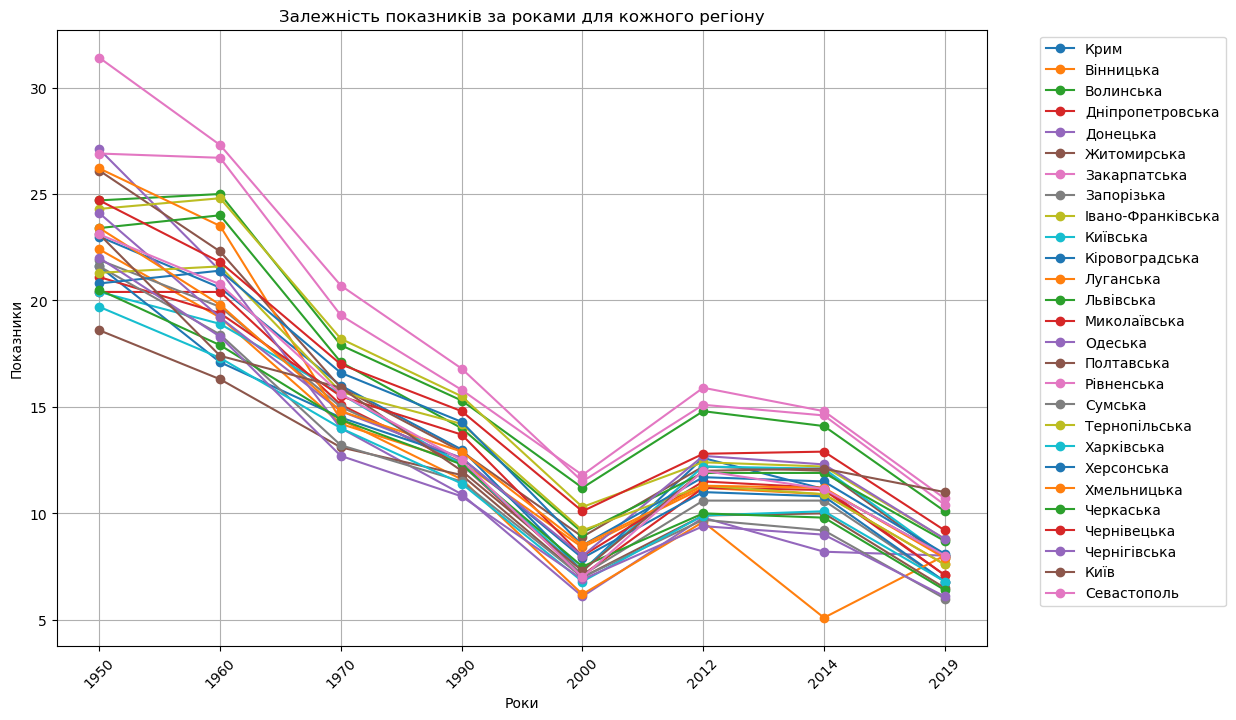

In [55]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df = df.fillna(df.mean(numeric_only=True), axis=0)

print("Таблиця після заповнення NaN:")
print(df)

year_columns = [col for col in df.columns if col.isdigit()]
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(year_columns, row[year_columns], marker='o', label=row['Регіон'])  # Малюємо лінію для кожного регіону
plt.title('Залежність показників за роками для кожного регіону')
plt.xlabel('Роки')
plt.ylabel('Показники')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


plt.show()

In [57]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_2019 = df['2019'].mean()
regions_above_average_2019 = df[df['2019'] > average_birth_2019]['Регіон']

print(f"Cередній рівень народжуваності у 2019 - {average_birth_2019}")

print("Регіони з рівнем народжуваності вище середнього у 2019 році:")
print(regions_above_average_2019)

Cередній рівень народжуваності у 2019 - 8.017391304347827
Регіони з рівнем народжуваності вище середнього у 2019 році:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [59]:
# У якому регіоні була найвища народжуваність у 2014 році?
highest_birth_2014 = df.loc[df['2014'].idxmax(), 'Регіон']
print(f"Регіон з найвищою народжуваністю у 2014 році: {highest_birth_2014}")

Регіон з найвищою народжуваністю у 2014 році: Рівненська


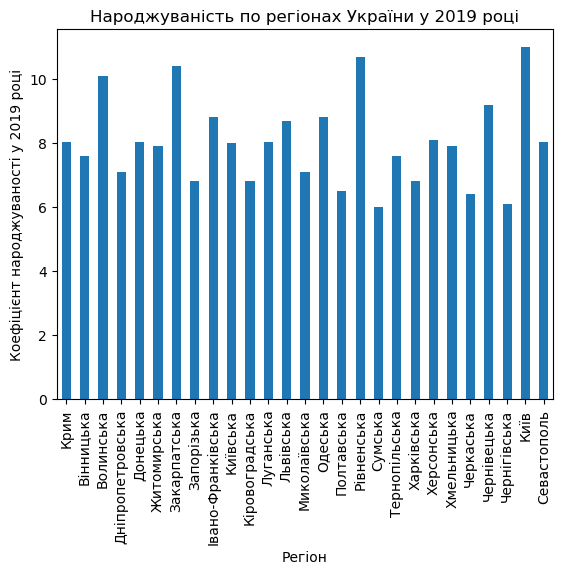

In [61]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

df.plot(kind='bar', x='Регіон', y='2019', legend=False)
plt.ylabel('Коефіцієнт народжуваності у 2019 році')
plt.title('Народжуваність по регіонах України у 2019 році')
plt.show()

ValueError: 'codes' must be a 1D list or array with the same length of 'vertices'. Your vertices have shape (13, 2) but your codes have shape (12,)

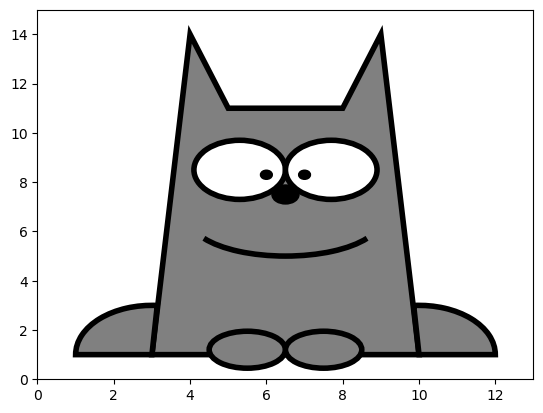

In [69]:
# Ну це точно унікально)))
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Ellipse, Arc, Wedge, Polygon, PathPatch
from matplotlib.path import Path

def draw_cat(ax):
    # Тулуб кота
    poly = [(3, 1), (4, 14), (5, 11), (8, 11), (9, 14), (10, 1)]
    polygon = Polygon(poly, fc="grey", ec="black", lw=4)
    ax.add_patch(polygon)

    # Очі
    circle = Circle((5.3, 8.5), 1.2, fc="white", ec="black", lw=4)
    ax.add_patch(circle)

    circle = Circle((7.7, 8.5), 1.2, fc="white", ec="black", lw=4)
    ax.add_patch(circle)

    # Зрачки
    circle = Circle((6, 8.3), 0.1, fc="black", ec="black", lw=4)
    ax.add_patch(circle)

    circle = Circle((7, 8.3), 0.1, fc="black", ec="black", lw=4)
    ax.add_patch(circle)

    # Ніс
    circle = Circle((6.5, 7.5), 0.3, fc="black", ec="black", lw=4)
    ax.add_patch(circle)

    # Задні лапи
    wedge = Wedge((3, 1), 2, 86, 180, fc="grey", ec="black", lw=4)
    ax.add_patch(wedge)

    wedge = Wedge((10, 1), 2, 0, 94, fc="grey", ec="black", lw=4)
    ax.add_patch(wedge)

    # Передні лапи
    ellipse = Ellipse((5.5, 1.2), 2, 1.5, fc="grey", ec="black", lw=4)
    ax.add_patch(ellipse)

    ellipse = Ellipse((7.5, 1.2), 2, 1.5, fc="grey", ec="black", lw=4)
    ax.add_patch(ellipse)

    # Усмішка
    arc = Arc((6.5, 6.5), 5, 3, angle=0, theta1=200, theta2=340, lw=4, fill=False)
    ax.add_patch(arc)

    # Лінії між носом і усмішкою, вуса
    vertices = [(6.5, 5), (6.5, 7.5), (10, 6), (6.5, 7.5), (10, 6.5), (6.5, 7.5), (10, 7),
                (6.5, 7.5), (3, 6), (6.5, 7.5), (3, 6.5), (6.5, 7.5), (3, 7)]

    codes = [Path.MOVETO, Path.LINETO, Path.MOVETO, Path.LINETO, Path.MOVETO, Path.LINETO, 
             Path.MOVETO, Path.LINETO, Path.MOVETO, Path.LINETO, Path.MOVETO, Path.LINETO]

    path = Path(vertices, codes)
    path_patch = PathPatch(path, fill=False, lw=1)
    ax.add_patch(path_patch)

# Встановлення розміру та координат для області малювання
n = 13
m = 15
plt.xlim(0, n)
plt.ylim(0, m)

# Створення області для малювання
ax = plt.gca()
draw_cat(ax)

# Видалення осей та показ малюнку
ax.axes.set_axis_off()
plt.show()